<a href="https://colab.research.google.com/github/TonyPham2501/AIhomework/blob/main/AI_Exercise_Fuzzy_NoiCom.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install scikit-fuzzy   # thư viện fuzzy logic  ( logic mờ )

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 32.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=9b46feef3c3ffd0b4ec5f73ab506d17c25ed403c4fd3f6a88b40e2fb7a10f7fe
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


65.68027210884355


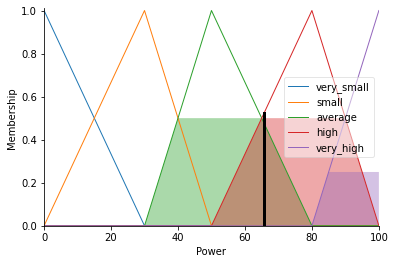

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

time = ctrl.Antecedent(np.arange(0,181,1),'Time') #đầu vào
rice = ctrl.Antecedent(np.arange(200,1001,1),'Rice')  #đầu vào
power = ctrl.Consequent(np.arange(0,101,1),'Power')  #đầu ra

# Time 10 - 180 minutes  10 30 70 90 130 160 180
time['very_slow'] = fuzz.trimf(time.universe,[130,160,180])  
time['slow'] = fuzz.trimf(time.universe,[90,130,160]) 
time['average'] = fuzz.trimf(time.universe,[70,90,130]) 
time['fast'] = fuzz.trimf(time.universe,[30,70,90])  
time['very_fast'] = fuzz.trimf(time.universe,[10,30,70]) 

# Rice 200 - 1000 gram    200 300 400 500 600 800 1000
rice['very_less'] = fuzz.trimf(rice.universe,[200,300,400])  
rice['less'] = fuzz.trimf(rice.universe,[300,400,500])  
rice['average'] = fuzz.trimf(rice.universe,[400,500,600])  
rice['much'] = fuzz.trimf(rice.universe,[500,600,800])  
rice['very_much'] = fuzz.trimf(rice.universe,[600,800,1000])  


# Power 0 - 100 %    0 30 50 80 100
power['very_small'] = fuzz.trimf(power.universe,[0,0,30]) 
power['small'] = fuzz.trimf(power.universe,[0,30,50]) 
power['average'] = fuzz.trimf(power.universe,[30,50,80]) 
power['high'] = fuzz.trimf(power.universe,[50,80,100]) 
power['very_high'] = fuzz.trimf(power.universe,[80,100,100]) 

#time.view()
#rice.view()
#power.view()

#Khai báo Rule
rule1=ctrl.Rule(time['very_slow'] & rice['very_less'], power['very_small'])
rule2=ctrl.Rule(time['very_slow'] & rice['less'], power['small'])
rule3=ctrl.Rule(time['very_slow'] & rice['average'], power['small'])
rule4=ctrl.Rule(time['very_slow'] & rice['much'], power['average'])
rule5=ctrl.Rule(time['very_slow'] & rice['very_much'], power['average'])

rule6=ctrl.Rule(time['slow'] & rice['very_less'], power['very_small'])
rule7=ctrl.Rule(time['slow'] & rice['less'], power['small'])
rule8=ctrl.Rule(time['slow'] & rice['average'], power['average'])
rule9=ctrl.Rule(time['slow'] & rice['much'], power['average'])
rule10=ctrl.Rule(time['slow'] & rice['very_much'], power['high'])

rule11=ctrl.Rule(time['average'] & rice['very_less'], power['very_small'])
rule12=ctrl.Rule(time['average'] & rice['less'], power['small'])
rule13=ctrl.Rule(time['average'] & rice['average'], power['average'])
rule14=ctrl.Rule(time['average'] & rice['much'], power['high'])
rule15=ctrl.Rule(time['average'] & rice['very_much'], power['very_high'])

rule16=ctrl.Rule(time['fast'] & rice['very_less'], power['small'])
rule17=ctrl.Rule(time['fast'] & rice['less'], power['small'])
rule18=ctrl.Rule(time['fast'] & rice['average'], power['high'])
rule19=ctrl.Rule(time['fast'] & rice['much'], power['high'])
rule20=ctrl.Rule(time['fast'] & rice['very_much'], power['very_high'])

rule21=ctrl.Rule(time['very_fast'] & rice['very_less'], power['small'])
rule22=ctrl.Rule(time['very_fast'] & rice['less'], power['average'])
rule23=ctrl.Rule(time['very_fast'] & rice['average'], power['high'])
rule24=ctrl.Rule(time['very_fast'] & rice['much'], power['very_high'])
rule25=ctrl.Rule(time['very_fast'] & rice['very_much'], power['very_high'])
#rule1.view()

#Xử lý
powering_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10,
                                    rule11, rule12, rule13, rule14, rule15, rule16, rule17, rule18, rule19,
                                    rule20, rule21, rule22, rule23, rule24, rule25])
powering = ctrl.ControlSystemSimulation(powering_ctrl)
powering.input['Time'] = 120   # Time 10 - 180 minutes 
powering.input['Rice'] = 700    # Rice 200 - 1000 gram
powering.compute()
print(powering.output['Power'])
power.view(sim = powering)






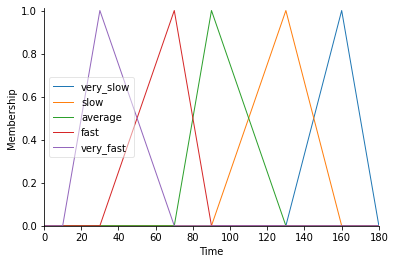

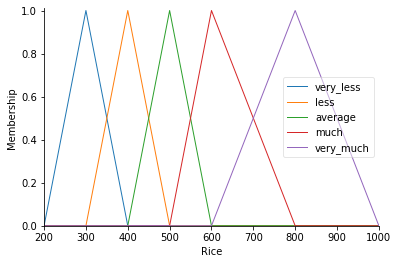

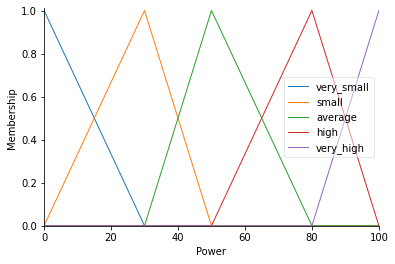

In [ ]:
time.view()
rice.view()
power.view()